In [1]:
# Set up simple CNN for MNIST hand-written digits image recognition
#import the necessary libraries 
%matplotlib inline

import tensorflow as tf 
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K
import numpy as np

In [2]:
mnist = tf.keras.datasets.mnist

7


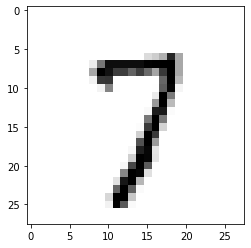

In [3]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

image_index = 258 # You may select anything up to 60,000
print(y_train[image_index]) # The label 
plt.imshow(x_train[image_index], cmap='Greys')

In [4]:
#check the shape of the imput elements

x_train.shape

(60000, 28, 28)

In [5]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [6]:

# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [7]:
# Creating a Sequential Model and adding the layers
#layerconv = Conv2D(28, kernel_size=(3,3), input_shape=input_shape)
#print(layerconv.kernel)
#print(layerconv.kernel_initializer.seed)
#print("*******")
#layerconv = Dropout(0.2)
#print(layerconv.strides)
#print(layerconv.kernel_initializer)


model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [8]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history=model.fit(x=x_train,y=y_train, epochs=200)

Epoch 1/200
1875/1875 [==============================] - 65s 34ms/step - loss: 0.3619 - accuracy: 0.8896
Epoch 2/200
1875/1875 [==============================] - 73s 39ms/step - loss: 0.1304 - accuracy: 0.9579
Epoch 3/200
1875/1875 [==============================] - 64s 34ms/step - loss: 0.1025 - accuracy: 0.9675
Epoch 4/200
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0821 - accuracy: 0.9740
Epoch 5/200
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0696 - accuracy: 0.9780
Epoch 6/200
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0588 - accuracy: 0.9812
Epoch 7/200
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0534 - accuracy: 0.9816
Epoch 8/200
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0515 - accuracy: 0.9839
Epoch 9/200
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0423 - accuracy: 0.9864
Epoch 10/200
1875/1875 [==============================]

1875/1875 [==============================] - 56s 30ms/step - loss: 0.0174 - accuracy: 0.9965
Epoch 153/200
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0147 - accuracy: 0.9970
Epoch 154/200
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0178 - accuracy: 0.9963
Epoch 155/200
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0286 - accuracy: 0.9955
Epoch 156/200
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0140 - accuracy: 0.9970
Epoch 157/200
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0178 - accuracy: 0.9961
Epoch 158/200
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0221 - accuracy: 0.9959
Epoch 159/200
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0241 - accuracy: 0.9957
Epoch 160/200
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0204 - accuracy: 0.9959
Epoch 161/200
1875/1875 [==========================

In [11]:
import pandas as pd 
# convert the history.history dict to a pandas DataFrame:     
hist_d = pd.DataFrame(history.history) 

# save to json:  
hist_json_file = 'history.json' 
with open(hist_json_file, mode='w') as f:
    hist_d.to_json(f)

In [ ]:
#Code to get the output of network layers

inp = model.input                                           # input placeholder
outputs = [layer.output for layer in model.layers]          # all layer outputs
functors = [K.function([inp], [out]) for out in outputs]    # evaluation functions

# Testing
test = np.random.random(input_shape)[np.newaxis,...]
layer_outs = [func([test]) for func in functors]
#print(layer_outs)
print(layer_outs[0][0][0][0][0])

In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
image_index = 7850
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('modelno100.tflite', 'wb') as f:
  f.write(tflite_model)